<a href="https://colab.research.google.com/github/anishadh137/PUS2020_AAdhikari/blob/master/HW4/PUS2020_HW4_AnishAdhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install census
!pip install CensusData

     |████████████████████████████████| 23.2MB 1.6MB/s 
  Created wheel for CensusData: filename=CensusData-1.9-cp36-none-any.whl size=24706266 sha256=4bc43d257a0000bd3be8c91bc166a1ba2feb3a47051a5932b7af76db62d1272b
  Stored in directory: /root/.cache/pip/wheels/39/4c/19/0770e56b66921fd366a5d32382b3db71e54aa98259f6bc88cb
Successfully built CensusData


In [2]:
!pip install us

     |████████████████████████████████| 133kB 3.9MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11928 sha256=2a2fe04e3e4596e8ec62e11feeefc70adf4bc6de73cbf902d4296c53f4a8dff6
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74729 sha256=9cb94aa3da1b27a025f2bdd9e1a61bf877eed4796c3e6726ade2170f95f6e9e3
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 14.5MB/s 
     |████████████████████████████████| 14.8MB 312kB/s 


In [4]:
!pip install shapely

In [5]:
#loading module for mapping
import geopandas as gpd
import pandas as pd
import numpy as np
import pylab as plt 

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
cd /content/drive/'My Drive'

/content/drive/My Drive


In [8]:
myAPIkey = pd.read_csv("myapis.csv")

In [9]:
#readinf race data at the county level 
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)

In [10]:
#looking into the census varaibles that are approraite for race
#using the 5 year American Community Survey (acs5)
censusdata.search('acs5', 2018, 'concept', 'race')

[('B01001F_001E', 'SEX BY AGE (SOME OTHER RACE ALONE)', 'Estimate!!Total'),
 ('B01001F_002E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male'),
 ('B01001F_003E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001F_004E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001F_005E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001F_006E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001F_007E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001F_008E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001F_009E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001F_010E',
  'SEX BY AGE (SOME OTHER RACE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001F_011E',
  'SEX

In [11]:
#selecting the variables that interest us B02001_001E (Race total), B02001_002E (whie alone), B02001_003E (Black alone)

In [12]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B02001')),

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B02001_001E  | RACE                           | !! Estimate Total                                        | int  
B02001_002E  | RACE                           | !! !! Estimate Total White alone                         | int  
B02001_003E  | RACE                           | !! !! Estimate Total Black or African American alone     | int  
B02001_004E  | RACE                           | !! !! Estimate Total American Indian and Alaska Native a | int  
B02001_005E  | RACE                           | !! !! Estimate Total Asian alone                         | int  
B02001_006E  | RACE                           | !! !! Estimate Total Native Hawaiian and Other Pacific I | int  
B02001_007E  | RACE                           | !! !! Estimate Total Some other race alone   

(None,)

In [13]:
#getting the state code for DE
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

In [14]:
#getting the data at county level 

In [53]:
total18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty18 = censusdata.download('acs5', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
wDEcounty18.head()                                

,B02001_002E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",358183
"Sussex County, Delaware: Summary level: 050, state:10> county:005",180762
"Kent County, Delaware: Summary level: 050, state:10> county:001",115960


In [54]:
#getting the data for previous ACS5 2013
total13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_001E"])
wDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_002E"])
bDEcounty13 = censusdata.download('acs5', 2013,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B02001_003E"])
bDEcounty13.head()              

,B02001_003E
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029


In [55]:
#merging the dataframes_white
wDEcounty13 = wDEcounty13.merge(total13, left_index=True, right_index=True)
wDEcounty18 = wDEcounty18.merge(total18, left_index=True, right_index=True)

In [57]:
#merging the dataframes_black
bDEcounty13 = bDEcounty13.merge(total13, left_index=True, right_index=True)
bDEcounty18 = bDEcounty18.merge(total18, left_index=True, right_index=True)

In [56]:
wDEcounty18

,B02001_002E,B02001_001E
"New Castle County, Delaware: Summary level: 050, state:10> county:003",358183,555133
"Sussex County, Delaware: Summary level: 050, state:10> county:005",180762,219540
"Kent County, Delaware: Summary level: 050, state:10> county:001",115960,174822


In [58]:
bDEcounty13

,B02001_003E,B02001_001E
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802,165030
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133,542784
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029,200632


In [59]:
#calculating fraction of  white people
wDEcounty13['white_frac']=wDEcounty13['B02001_002E']/wDEcounty13['B02001_001E']
wDEcounty18['white_frac']=wDEcounty18['B02001_002E']/wDEcounty18['B02001_001E']


In [63]:
#calculating fraction of  black people
bDEcounty13['black_frac']=bDEcounty13['B02001_003E']/bDEcounty13['B02001_001E']
bDEcounty18['black_frac']=bDEcounty18['B02001_003E']/bDEcounty18['B02001_001E']


In [60]:
wDEcounty13


,B02001_002E,B02001_001E,white_frac
"Kent County, Delaware: Summary level: 050, state:10> county:001",112559,165030,0.682052
"New Castle County, Delaware: Summary level: 050, state:10> county:003",361966,542784,0.666869
"Sussex County, Delaware: Summary level: 050, state:10> county:005",160949,200632,0.802210


In [66]:
bDEcounty13

,B02001_003E,B02001_001E,black_frac
"Kent County, Delaware: Summary level: 050, state:10> county:001",39802,165030,0.241180
"New Castle County, Delaware: Summary level: 050, state:10> county:003",130133,542784,0.239751
"Sussex County, Delaware: Summary level: 050, state:10> county:005",25029,200632,0.124751


In [67]:
#defining a function to split the string on each row of index 
def getcounty(cname):
  return cname.split(':')[-1]

In [68]:
# manipulate indext to extract the county
wDEcounty18['county'] = wDEcounty18.index.astype(str).map(getcounty)
bDEcounty18['county'] = bDEcounty18.index.astype(str).map(getcounty)
wDEcounty13['county'] = wDEcounty13.index.astype(str).map(getcounty)
bDEcounty13['county'] = bDEcounty13.index.astype(str).map(getcounty)


wDEcounty18

,B02001_002E,B02001_001E,white_frac,county
"New Castle County, Delaware: Summary level: 050, state:10> county:003",358183,555133,0.645220,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",180762,219540,0.823367,005
"Kent County, Delaware: Summary level: 050, state:10> county:001",115960,174822,0.663303,001


In [71]:
bDEcounty18

,B02001_003E,B02001_001E,black_frac,county
"New Castle County, Delaware: Summary level: 050, state:10> county:003",138608,555133,0.249684,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",26992,219540,0.122948,005
"Kent County, Delaware: Summary level: 050, state:10> county:001",44292,174822,0.253355,001


In [ ]:
#getting the DE Shape file and mapping

In [72]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip

--2020-09-29 03:30:44--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 184.26.69.248, 2600:1402:2000:1a3::208c, 2600:1402:2000:183::208c
Connecting to www2.census.gov (www2.census.gov)|184.26.69.248|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip’

tl_2018_10_tract.zi     [ <=>                ] 997.34K  --.-KB/s    in 0.1s    

2020-09-29 03:30:44 (8.30 MB/s) - ‘tl_2018_10_tract.zip’ saved [1021272]



In [73]:
#saving it on the drive and unzipping it 
!unzip tl_2018_10_tract.zip

Archive:  tl_2018_10_tract.zip
 extracting: tl_2018_10_tract.cpg    
  inflating: tl_2018_10_tract.dbf    
  inflating: tl_2018_10_tract.prj    
  inflating: tl_2018_10_tract.shp    
  inflating: tl_2018_10_tract.shp.ea.iso.xml  
  inflating: tl_2018_10_tract.shp.iso.xml  
  inflating: tl_2018_10_tract.shx    


In [95]:
#creating a geodatabase for delaware 
gde = gpd.GeoDataFrame.from_file("tl_2018_10_tract.shp")

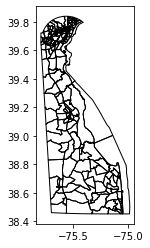

In [96]:
gde.plot(color="None", edgecolor='k')

In [97]:
#removing the census tracts that are all water. Using the ALAND column 
gde=gde[gde.ALAND>0].dropna()


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


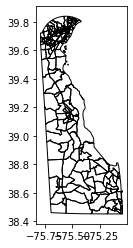

In [109]:
#checking if the drop workded
gde.plot(color="None", edgecolor='k')

In [139]:
wDEcounty18
wDEcounty18.columns

Index(['B02001_002E', 'B02001_001E', 'white_frac', 'county'], dtype='object')

In [140]:
#renaming the column to match with the geodatabase
wDErecounty18=wDEcounty18.rename({'county':'COUNTYFP'}, axis=1, inplace=True)

In [152]:
#renaming the column to match with the geodatabase
wDEcounty13.rename({'county':'COUNTYFP'}, axis=1, inplace=True)

In [158]:
bDEcounty13.rename({'county':'COUNTYFP'}, axis=1, inplace=True)
bDEcounty18.rename({'county':'COUNTYFP'}, axis=1, inplace=True)

In [153]:
wDEcounty13

,B02001_002E,B02001_001E,white_frac,COUNTYFP
"Kent County, Delaware: Summary level: 050, state:10> county:001",112559,165030,0.682052,001
"New Castle County, Delaware: Summary level: 050, state:10> county:003",361966,542784,0.666869,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",160949,200632,0.802210,005


In [149]:
#merging the geodatabase with the dataframe 
wgdeDE18= gde.merge(wDEcounty18, left_index=False, right_index=False)

In [154]:
wgdeDE13 = gde.merge(wDEcounty13, left_index=False, right_index=False)

In [165]:
bgdeDE13 = gde.merge(bDEcounty13, left_index=False, right_index=False)
bgdeDE18 = gde.merge(bDEcounty18, left_index=False, right_index=False)

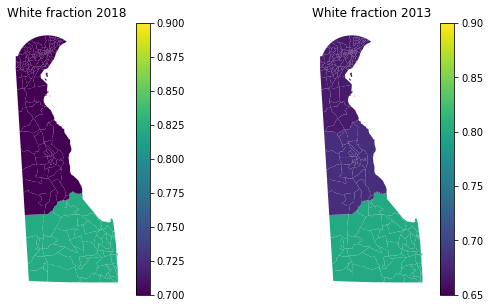

In [175]:
#mapping the fraction of white populatoin in 2018 and 2013
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
wgdeDE18.plot(column="white_frac", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.7, vmax=0.9)
ax.axis('off');
plt.title("White fraction 2018")

ax = fig.add_subplot(122)
wgdeDE13.plot(column="white_frac", 
               ax=ax, legend=True, vmin=0.65, vmax=0.9);
ax.axis('off');
plt.title("White fraction 2013");

Fig 1. This shows the fraction of White population in Delaware in the year of 2013 and 2018.


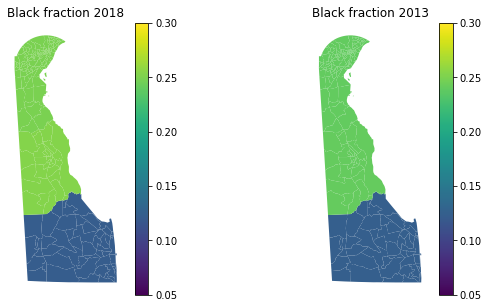

In [176]:
# map the fraction of Black populatoin in 2018 and 2013
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
bgdeDE18.plot(column="black_frac", #scheme='Quantiles',
            ax=ax, legend=True, vmin=0.05, vmax=0.3)
ax.axis('off');
plt.title("Black fraction 2018")

ax = fig.add_subplot(122)
bgdeDE13.plot(column="black_frac", 
               ax=ax, legend=True, vmin=0.05, vmax=0.3);
ax.axis('off');
plt.title("Black fraction 2013");

Fig 2. This shows the fraction of African American population in Delaware in the year of 2013 and 2018.


# Mapping Under Age 5 population for the year of 2018 at Census Tract Level

In [181]:
censusdata.search('acs5', 2018, 'concept', 'age')

[('B01001A_001E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total'),
 ('B01001A_002E', 'SEX BY AGE (WHITE ALONE)', 'Estimate!!Total!!Male'),
 ('B01001A_003E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!Under 5 years'),
 ('B01001A_004E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!5 to 9 years'),
 ('B01001A_005E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!10 to 14 years'),
 ('B01001A_006E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!15 to 17 years'),
 ('B01001A_007E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!18 and 19 years'),
 ('B01001A_008E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!20 to 24 years'),
 ('B01001A_009E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!25 to 29 years'),
 ('B01001A_010E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!30 to 34 years'),
 ('B01001A_011E',
  'SEX BY AGE (WHITE ALONE)',
  'Estimate!!Total!!Male!!35 to 44 years'),
 ('B01001A_012E',
  'SEX BY AGE (WHI

In [184]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B01001')),

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B01001_001E  | SEX BY AGE                     | !! Estimate Total                                        | int  
B01001_002E  | SEX BY AGE                     | !! !! Estimate Total Male                                | int  
B01001_003E  | SEX BY AGE                     | !! !! !! Estimate Total Male Under 5 years               | int  
B01001_004E  | SEX BY AGE                     | !! !! !! Estimate Total Male 5 to 9 years                | int  
B01001_005E  | SEX BY AGE                     | !! !! !! Estimate Total Male 10 to 14 years              | int  
B01001_006E  | SEX BY AGE                     | !! !! !! Estimate Total Male 15 to 17 years              | int  
B01001_007E  | SEX BY AGE                     | !! !! !! Estimate Total Male 18 and 19 years 

(None,)

In [192]:
maleunder5_18 = censusdata.download('acs5', 2018,
                            censusdata.censusgeo([('state', '10'),
                                                  ('tract', '*')]), ["B01001_003E"])

In [193]:
maleunder5_18.head()

,B01001_003E
"Census Tract 4, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:000400",76
"Census Tract 13, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:001300",87
"Census Tract 26, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:002600",85
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",65
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",142


In [194]:
def gettract(cname):
  return cname.split(':') [-1]

In [195]:
maleunder5_18["TRACTCE"] = maleunder5_18.index.astype(str).map(gettract)

In [196]:
maleunder5_18

,B01001_003E,TRACTCE
"Census Tract 4, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:000400",76,000400
"Census Tract 13, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:001300",87,001300
"Census Tract 26, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:002600",85,002600
"Census Tract 102, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010200",65,010200
"Census Tract 103, New Castle County, Delaware: Summary level: 140, state:10> county:003> tract:010300",142,010300
...,...,...
"Census Tract 507.04, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050704",120,050704
"Census Tract 507.05, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050705",48,050705
"Census Tract 509.01, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050901",110,050901
"Census Tract 509.02, Sussex County, Delaware: Summary level: 140, state:10> county:005> tract:050902",43,050902


In [191]:
gde.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,005,050901,10005050901,509.01,Census Tract 509.01,G5020,S,55799632,1445115,+38.7916515,-075.2178310,"POLYGON ((-75.30876 38.82407, -75.30854 38.824..."
1,10,005,051201,10005051201,512.01,Census Tract 512.01,G5020,S,10970300,8603327,+38.5824814,-075.0775156,"POLYGON ((-75.10319 38.60686, -75.09522 38.607..."
2,10,005,051305,10005051305,513.05,Census Tract 513.05,G5020,S,24118741,1659911,+38.4682914,-075.1333154,"POLYGON ((-75.18555 38.45140, -75.18516 38.451..."
3,10,005,050602,10005050602,506.02,Census Tract 506.02,G5020,S,28579321,1115321,+38.5587541,-075.2955850,"POLYGON ((-75.33985 38.54959, -75.33903 38.549..."
4,10,005,050501,10005050501,505.01,Census Tract 505.01,G5020,S,110698239,677102,+38.6930150,-075.4367201,"POLYGON ((-75.53136 38.71027, -75.53119 38.710..."


In [197]:
maleDEunder518= gde.merge(maleunder5_18, left_index=False, right_index=False)

In [199]:
maleDEunder518.B01001_003E.describe()

count    215.000000
mean     129.362791
std       94.096036
min        0.000000
25%       62.000000
50%      106.000000
75%      173.500000
max      461.000000
Name: B01001_003E, dtype: float64

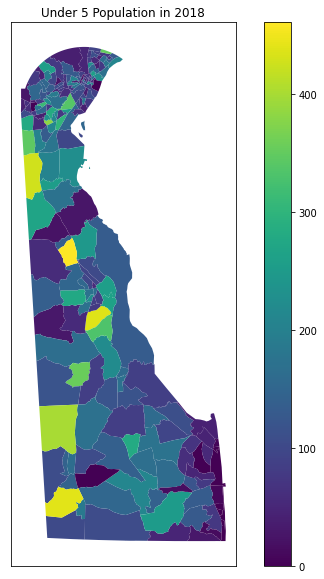

In [210]:
#plotting the under 5 population in 2018

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
maleDEunder518.plot(column='B01001_003E',cmap='viridis',alpha=1,linewidth=0.1,ax=ax, legend=True, k=5)
plt.title("Under 5 Population in 2018");

Fig 3. This shows the Population under the age of 5 in Delaware in the year of 2018.
